In [6]:
#imports
import os
import sys
import random
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label

from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

import tensorflow as tf

Using TensorFlow backend.


### Download Data

In [2]:
#retrieve image zip folder
!curl -L -o pix.zip https://www.dropbox.com/s/b0xxuq5pi91ckv5/pix.zip?dl=0

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:06 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:06 --:--:--     0
100  1034    0  1034    0     0    129      0 --:--:--  0:00:08 --:--:--   795
100 3066M  100 3066M    0     0  12.5M      0  0:04:05  0:04:05 --:--:-- 12.2M 0:01:53  0:02:24 12.3M 0:02:24  0:01:47 13.2M


In [ ]:
#unzip images and store in data folder
!mkdir data
!unzip -q pix.zip -d data

In [1]:
#Remove all non 'rainview' images, verify
!rm data/pix/*.gif
!rm data/pix/*.csv
!rm data/pix/radar*
!rm data/pix/sat*
!ls data/pix

rm: cannot remove 'data/pix/*.gif': No such file or directory
rm: cannot remove 'data/pix/*.csv': No such file or directory
rm: cannot remove 'data/pix/radar*': No such file or directory
rm: cannot remove 'data/pix/sat*': No such file or directory


rainview_AMSTERDAM_3509888_1911222200.png
rainview_AMSTERDAM_3509888_1911222300.png
rainview_AMSTERDAM_3509888_1911230000.png
rainview_AMSTERDAM_3509888_1911230100.png
rainview_AMSTERDAM_3509888_1911230200.png
rainview_AMSTERDAM_3509888_1911230300.png
rainview_AMSTERDAM_3509888_1911230400.png
rainview_AMSTERDAM_3509888_1911230500.png
rainview_AMSTERDAM_3509888_1911230600.png
rainview_AMSTERDAM_3509888_1911230700.png
rainview_AMSTERDAM_3509888_1911230800.png
rainview_AMSTERDAM_3509888_1911230900.png
rainview_AMSTERDAM_3509888_1911231000.png
rainview_AMSTERDAM_3509888_1911231100.png
rainview_AMSTERDAM_3509888_1911231200.png
rainview_AMSTERDAM_3509888_1911231300.png
rainview_AMSTERDAM_3509888_1911231400.png
rainview_AMSTERDAM_3509888_1911231500.png
rainview_AMSTERDAM_3509888_1911231600.png
rainview_AMSTERDAM_3509888_1911231700.png
rainview_AMSTERDAM_3509888_1911231800.png
rainview_AMSTERDAM_3509888_1911231900.png
rainview_AMSTERDAM_3509888_1911232000.png
rainview_AMSTERDAM_3509888_1911232

rainview_Bielefeld_170367_1911230000.png
rainview_Bielefeld_170367_1911230100.png
rainview_Bielefeld_170367_1911230200.png
rainview_Bielefeld_170367_1911230300.png
rainview_Bielefeld_170367_1911230400.png
rainview_Bielefeld_170367_1911230500.png
rainview_Bielefeld_170367_1911230600.png
rainview_Bielefeld_170367_1911230700.png
rainview_Bielefeld_170367_1911230800.png
rainview_Bielefeld_170367_1911230900.png
rainview_Bielefeld_170367_1911231000.png
rainview_Bielefeld_170367_1911231100.png
rainview_Bielefeld_170367_1911231200.png
rainview_Bielefeld_170367_1911231300.png
rainview_Bielefeld_170367_1911231400.png
rainview_Bielefeld_170367_1911231500.png
rainview_Bielefeld_170367_1911231600.png
rainview_Bielefeld_170367_1911231700.png
rainview_Bielefeld_170367_1911231800.png
rainview_Bielefeld_170367_1911231900.png
rainview_Bielefeld_170367_1911232000.png
rainview_Bielefeld_170367_1911232100.png
rainview_Bielefeld_170367_1911232200.png
rainview_Bielefeld_170367_1911232300.png
rainview_Bielefe

rainview_Cincinnati_2190961_1911242200.png
rainview_Cincinnati_2190961_1911242300.png
rainview_Cincinnati_2190961_1911250000.png
rainview_Cincinnati_2190961_1911250100.png
rainview_Cincinnati_2190961_1911250200.png
rainview_Cincinnati_2190961_1911250300.png
rainview_Cincinnati_2190961_1911250400.png
rainview_Cincinnati_2190961_1911250500.png
rainview_Cincinnati_2190961_1911250600.png
rainview_Cincinnati_2190961_1911250700.png
rainview_Cincinnati_2190961_1911250800.png
rainview_Cincinnati_2190961_1911250900.png
rainview_Cincinnati_2190961_1911251000.png
rainview_Cincinnati_2190961_1911251100.png
rainview_Cincinnati_2190961_1911251200.png
rainview_Cincinnati_2190961_1911251300.png
rainview_Cincinnati_2190961_1911251400.png
rainview_Cincinnati_2190961_1911251500.png
rainview_Cincinnati_2190961_1911251600.png
rainview_Cincinnati_2190961_1911251700.png
rainview_Cincinnati_2190961_1911251800.png
rainview_Cincinnati_2190961_1911251900.png
rainview_Cincinnati_2190961_1911252000.png
rainview_Ci

rainview_Durham_329821_1911270800.png
rainview_Durham_329821_1911270900.png
rainview_Durham_329821_1911271000.png
rainview_Durham_329821_1911271100.png
rainview_Durham_329821_1911271200.png
rainview_Durham_329821_1911271300.png
rainview_Durham_329821_1911271400.png
rainview_Durham_329821_1911271500.png
rainview_Durham_329821_1911271600.png
rainview_Durham_329821_1911271700.png
rainview_Durham_329821_1911271800.png
rainview_Durham_329821_1911271900.png
rainview_Durham_329821_1911272000.png
rainview_Durham_329821_1911272100.png
rainview_Durham_329821_1911272200.png
rainview_Durham_329821_1911272300.png
rainview_Durham_329821_1911280000.png
rainview_Durham_329821_1911280100.png
rainview_Durham_329821_1911280200.png
rainview_Durham_329821_1911280300.png
rainview_Durham_329821_1911280400.png
rainview_Durham_329821_1911280500.png
rainview_Durham_329821_1911280600.png
rainview_Durham_329821_1911280700.png
rainview_Durham_329821_1911280800.png
rainview_Durham_329821_1911280900.png
rainview_Dur

rainview_Gilbert[q]_341804_1911271300.png
rainview_Gilbert[q]_341804_1911271400.png
rainview_Gilbert[q]_341804_1911271500.png
rainview_Gilbert[q]_341804_1911271600.png
rainview_Gilbert[q]_341804_1911271700.png
rainview_Gilbert[q]_341804_1911271800.png
rainview_Gilbert[q]_341804_1911271900.png
rainview_Gilbert[q]_341804_1911272000.png
rainview_Gilbert[q]_341804_1911272100.png
rainview_Gilbert[q]_341804_1911272200.png
rainview_Gilbert[q]_341804_1911272300.png
rainview_Gilbert[q]_341804_1911280000.png
rainview_Gilbert[q]_341804_1911280100.png
rainview_Gilbert[q]_341804_1911280200.png
rainview_Gilbert[q]_341804_1911280300.png
rainview_Gilbert[q]_341804_1911280400.png
rainview_Gilbert[q]_341804_1911280500.png
rainview_Gilbert[q]_341804_1911280600.png
rainview_Gilbert[q]_341804_1911280700.png
rainview_Gilbert[q]_341804_1911280800.png
rainview_Gilbert[q]_341804_1911280900.png
rainview_Gilbert[q]_341804_1911281000.png
rainview_Gilbert[q]_341804_1911281100.png
rainview_Gilbert[q]_341804_1911281

rainview_Jersey City_329548_1911241800.png
rainview_Jersey City_329548_1911241900.png
rainview_Jersey City_329548_1911242000.png
rainview_Jersey City_329548_1911242100.png
rainview_Jersey City_329548_1911242200.png
rainview_Jersey City_329548_1911242300.png
rainview_Jersey City_329548_1911250000.png
rainview_Jersey City_329548_1911250100.png
rainview_Jersey City_329548_1911250200.png
rainview_Jersey City_329548_1911250300.png
rainview_Jersey City_329548_1911250400.png
rainview_Jersey City_329548_1911250500.png
rainview_Jersey City_329548_1911250600.png
rainview_Jersey City_329548_1911250700.png
rainview_Jersey City_329548_1911250800.png
rainview_Jersey City_329548_1911250900.png
rainview_Jersey City_329548_1911251000.png
rainview_Jersey City_329548_1911251100.png
rainview_Jersey City_329548_1911251200.png
rainview_Jersey City_329548_1911251300.png
rainview_Jersey City_329548_1911251400.png
rainview_Jersey City_329548_1911251500.png
rainview_Jersey City_329548_1911251600.png
rainview_Je

rainview_Long Beach_347631_1911260900.png
rainview_Long Beach_347631_1911261000.png
rainview_Long Beach_347631_1911261100.png
rainview_Long Beach_347631_1911261200.png
rainview_Long Beach_347631_1911261300.png
rainview_Long Beach_347631_1911261400.png
rainview_Long Beach_347631_1911261500.png
rainview_Long Beach_347631_1911261600.png
rainview_Long Beach_347631_1911261700.png
rainview_Long Beach_347631_1911261800.png
rainview_Long Beach_347631_1911261900.png
rainview_Long Beach_347631_1911262000.png
rainview_Long Beach_347631_1911262100.png
rainview_Long Beach_347631_1911262200.png
rainview_Long Beach_347631_1911262300.png
rainview_Long Beach_347631_1911270000.png
rainview_Long Beach_347631_1911270100.png
rainview_Long Beach_347631_1911270200.png
rainview_Long Beach_347631_1911270300.png
rainview_Long Beach_347631_1911270400.png
rainview_Long Beach_347631_1911270500.png
rainview_Long Beach_347631_1911270600.png
rainview_Long Beach_347631_1911270700.png
rainview_Long Beach_347631_1911270

rainview_Mykolaiv_324986_1911240000.png
rainview_Mykolaiv_324986_1911240100.png
rainview_Mykolaiv_324986_1911240200.png
rainview_Mykolaiv_324986_1911240300.png
rainview_MÃ¡laga_301670_1911222200.png
rainview_MÃ¡laga_301670_1911222300.png
rainview_MÃ¡laga_301670_1911230000.png
rainview_MÃ¡laga_301670_1911230100.png
rainview_MÃ¡laga_301670_1911230200.png
rainview_MÃ¡laga_301670_1911230300.png
rainview_MÃ¡laga_301670_1911230400.png
rainview_MÃ¡laga_301670_1911230500.png
rainview_MÃ¡laga_301670_1911230600.png
rainview_MÃ¡laga_301670_1911230700.png
rainview_MÃ¡laga_301670_1911230800.png
rainview_MÃ¡laga_301670_1911230900.png
rainview_MÃ¡laga_301670_1911231000.png
rainview_MÃ¡laga_301670_1911231100.png
rainview_MÃ¡laga_301670_1911231200.png
rainview_MÃ¡laga_301670_1911231300.png
rainview_MÃ¡laga_301670_1911231400.png
rainview_MÃ¡laga_301670_1911231500.png
rainview_MÃ¡laga_301670_1911231600.png
rainview_MÃ¡laga_301670_1911231700.png
rainview_MÃ¡laga_301670_1911231800.png
rainview_MÃ¡laga_3016

rainview_Paterson_329550_1911261200.png
rainview_Paterson_329550_1911261300.png
rainview_Paterson_329550_1911261400.png
rainview_Paterson_329550_1911261500.png
rainview_Paterson_329550_1911261600.png
rainview_Paterson_329550_1911261700.png
rainview_Paterson_329550_1911261800.png
rainview_Paterson_329550_1911261900.png
rainview_Paterson_329550_1911262000.png
rainview_Paterson_329550_1911262100.png
rainview_Paterson_329550_1911262200.png
rainview_Paterson_329550_1911262300.png
rainview_Paterson_329550_1911270000.png
rainview_Paterson_329550_1911270100.png
rainview_Paterson_329550_1911270200.png
rainview_Paterson_329550_1911270300.png
rainview_Paterson_329550_1911270400.png
rainview_Paterson_329550_1911270500.png
rainview_Paterson_329550_1911270600.png
rainview_Paterson_329550_1911270700.png
rainview_Paterson_329550_1911270800.png
rainview_Paterson_329550_1911270900.png
rainview_Paterson_329550_1911271000.png
rainview_Paterson_329550_1911271100.png
rainview_Paterson_329550_1911271200.png


rainview_Rockford_328767_1911261300.png
rainview_Rockford_328767_1911261400.png
rainview_Rockford_328767_1911261500.png
rainview_Rockford_328767_1911261600.png
rainview_Rockford_328767_1911261700.png
rainview_Rockford_328767_1911261800.png
rainview_Rockford_328767_1911261900.png
rainview_Rockford_328767_1911262000.png
rainview_Rockford_328767_1911262100.png
rainview_Rockford_328767_1911262200.png
rainview_Rockford_328767_1911262300.png
rainview_Rockford_328767_1911270000.png
rainview_Rockford_328767_1911270100.png
rainview_Rockford_328767_1911270200.png
rainview_Rockford_328767_1911270300.png
rainview_Rockford_328767_1911270400.png
rainview_Rockford_328767_1911270500.png
rainview_Rockford_328767_1911270600.png
rainview_Rockford_328767_1911270700.png
rainview_Rockford_328767_1911270800.png
rainview_Rockford_328767_1911270900.png
rainview_Rockford_328767_1911271000.png
rainview_Rockford_328767_1911271100.png
rainview_Rockford_328767_1911271200.png
rainview_Rockford_328767_1911271300.png


rainview_Sioux Falls_330686_1911241900.png
rainview_Sioux Falls_330686_1911242000.png
rainview_Sioux Falls_330686_1911242100.png
rainview_Sioux Falls_330686_1911242200.png
rainview_Sioux Falls_330686_1911242300.png
rainview_Sioux Falls_330686_1911250000.png
rainview_Sioux Falls_330686_1911250100.png
rainview_Sioux Falls_330686_1911250200.png
rainview_Sioux Falls_330686_1911250300.png
rainview_Sioux Falls_330686_1911250400.png
rainview_Sioux Falls_330686_1911250500.png
rainview_Sioux Falls_330686_1911250600.png
rainview_Sioux Falls_330686_1911250700.png
rainview_Sioux Falls_330686_1911250800.png
rainview_Sioux Falls_330686_1911250900.png
rainview_Sioux Falls_330686_1911251000.png
rainview_Sioux Falls_330686_1911251100.png
rainview_Sioux Falls_330686_1911251200.png
rainview_Sioux Falls_330686_1911251300.png
rainview_Sioux Falls_330686_1911251400.png
rainview_Sioux Falls_330686_1911251500.png
rainview_Sioux Falls_330686_1911251600.png
rainview_Sioux Falls_330686_1911251700.png
rainview_Si

rainview_Tuscaloosa_326703_1911280300.png
rainview_Tuscaloosa_326703_1911280400.png
rainview_Tuscaloosa_326703_1911280500.png
rainview_Tuscaloosa_326703_1911280600.png
rainview_Tuscaloosa_326703_1911280700.png
rainview_Tuscaloosa_326703_1911280800.png
rainview_Tuscaloosa_326703_1911280900.png
rainview_Tuscaloosa_326703_1911281000.png
rainview_Tuscaloosa_326703_1911281100.png
rainview_Tuscaloosa_326703_1911281200.png
rainview_Tuscaloosa_326703_1911281300.png
rainview_Tuscaloosa_326703_1911281400.png
rainview_Tuscaloosa_326703_1911281500.png
rainview_Tuscaloosa_326703_1911281600.png
rainview_Tuscaloosa_326703_1911281700.png
rainview_Tuscaloosa_326703_1911281800.png
rainview_Tuscaloosa_326703_1911281900.png
rainview_Tuscaloosa_326703_1911282000.png
rainview_Tuscaloosa_326703_1911282100.png
rainview_Tuscaloosa_326703_1911282200.png
rainview_Tuscaloosa_326703_1911282300.png
rainview_Tuscaloosa_326703_1911290000.png
rainview_Tuscaloosa_326703_1911290100.png
rainview_Tuscaloosa_326703_1911290

rainview_Yonkers_334624_1911271800.png
rainview_Yonkers_334624_1911271900.png
rainview_Yonkers_334624_1911272000.png
rainview_Yonkers_334624_1911272100.png
rainview_Yonkers_334624_1911272200.png
rainview_Yonkers_334624_1911272300.png
rainview_Yonkers_334624_1911280000.png
rainview_Yonkers_334624_1911280100.png
rainview_Yonkers_334624_1911280200.png
rainview_Yonkers_334624_1911280300.png
rainview_Yonkers_334624_1911280400.png
rainview_Yonkers_334624_1911280500.png
rainview_Yonkers_334624_1911280600.png
rainview_Yonkers_334624_1911280700.png
rainview_Yonkers_334624_1911280800.png
rainview_Yonkers_334624_1911280900.png
rainview_Yonkers_334624_1911281000.png
rainview_Yonkers_334624_1911281100.png
rainview_Yonkers_334624_1911281200.png
rainview_Yonkers_334624_1911281300.png
rainview_Yonkers_334624_1911281400.png
rainview_Yonkers_334624_1911281500.png
rainview_Yonkers_334624_1911281600.png
rainview_Yonkers_334624_1911281700.png
rainview_Yonkers_334624_1911281800.png
rainview_Yonkers_334624_1

In [7]:
# Set some parameters
BATCH_SIZE = 10 # the higher the better
IMG_WIDTH = 128 # for faster computing on kaggle
IMG_HEIGHT = 128 # for faster computing on kaggle
IMG_CHANNELS = 4

#SET PATHS TO DATA
TRAIN_PATH = './data/pix/'
TEST_PATH = './data/test/'

warnings.filterwarnings('ignore', category=UserWarning, module='skimage')
seed = 42

### Prepare Data

In [8]:
# Get train and test IDs
train_ids = sorted(next(os.walk(TRAIN_PATH))[2])
train_ids = train_ids[1:]

# Get and resize train images and masks
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    if n != 0:
        if prev_id_[9:20] == id_[9:20]:
            #define input for previous iteration
            pathX = TRAIN_PATH + prev_id_
            img = imread(pathX)[:,:,:IMG_CHANNELS]
            img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
            X_train[n-1] = img 
            #define output for previous iteration
            pathY = TRAIN_PATH + id_
            mask_= imread(pathY)[:,:,:IMG_CHANNELS]/255
            mask_ = resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
            Y_train[n-1] = mask_
    prev_id_ = id_
print('Done!')

100%|██████████████████████████████████████████████████████████████████████████| 49739/49739 [1:10:42<00:00, 11.72it/s]


Done!


In [24]:
print(X_train.shape)

(49739, 128, 128, 4)


In [9]:
# Verify length of dataset
print(len(X_train), len(Y_train))

49739 49739


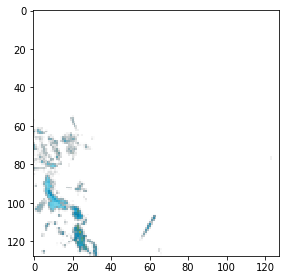

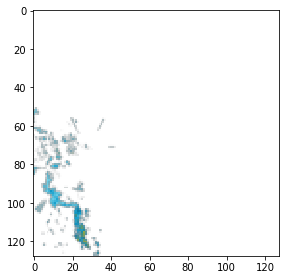

In [10]:
# Check if training data looks all right
ix = random.randint(0, len(train_ids))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()

### Build Model

In [17]:
# Build U-Net model
inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = Lambda(lambda x: x / 255) (inputs)

c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
c1 = Dropout(0.1) (c1)
c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Dropout(0.1) (c2)
c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Dropout(0.2) (c3)
c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
c4 = Dropout(0.2) (c4)
c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
c5 = Dropout(0.3) (c5)
c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
c6 = Dropout(0.2) (c6)
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
c7 = Dropout(0.2) (c7)
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
c8 = Dropout(0.1) (c8)
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Dropout(0.1) (c9)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

outputs = Conv2D(4, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 4)  0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 128, 128, 4)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 16) 592         lambda_1[0][0]                   
__________________________________________________________________________________________________
dropout_1 (Dropout)  

### Train Model

In [ ]:
# Fit model
earlystopper = EarlyStopping(patience=3, verbose=1)
checkpointer = ModelCheckpoint('model-w251weather-1.h5', verbose=1, save_best_only=True)
results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=64, epochs=50, 
                    callbacks=[earlystopper, checkpointer])

### Predict

In [11]:
# Predict on train, val and test
model = load_model('model-w251weather-1.h5',  custom_objects={'mean_iou': tf.keras.metrics.MeanIoU(num_classes=2)})
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)

25984/44765 [================>.............] - ETA: 13:2 - ETA: 12:3 - ETA: 11:2 - ETA: 10:4 - ETA: 10:2 - ETA: 10:0 - ETA: 10:0 - ETA: 10:0 - ETA: 10:1 - ETA: 10:2 - ETA: 10:2 - ETA: 10:2 - ETA: 10:1 - ETA: 10:1 - ETA: 10:0 - ETA: 10:0 - ETA: 9:5 - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - 

4974/4974 [==============================] - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 59s - ETA: 59 - ETA: 58 - ETA: 58 - ETA: 57 - ETA: 57 - ETA: 57 - ETA: 56 - ETA: 56 - ETA: 56 - ETA: 55 - ETA: 55 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 53 - ETA: 53 - ETA: 52 - ETA: 52 - ETA: 51 - ETA: 51 - ETA: 51 - ETA: 50 - ETA: 50 - ETA: 49 - ETA: 49 - ETA: 48 - ETA: 48 - ETA: 47 - ETA: 47 - ETA: 46 - ETA: 46 - ETA: 45 - ETA: 45 - ETA: 45 - ETA: 44 - ETA: 44 - ETA: 43 - ETA: 43 - ETA: 42 - ETA: 42 - ETA: 41 - ETA: 41 - ETA: 40 - ETA: 40 - ETA: 39 - ETA: 39 - ETA: 39 - ETA: 38 - ETA: 38 - ETA: 37 - ETA: 37 - ETA: 36 - ETA: 36 - ETA: 35 - ETA: 35 - ETA: 34 - ETA: 34 - ETA: 33 - ETA: 33 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 31 - ETA: 31 - ETA: 30 - ETA: 30 - ETA: 29 - ETA: 29 - ETA: 28 - ETA: 28 - ETA: 27 - ETA: 27 - ETA:

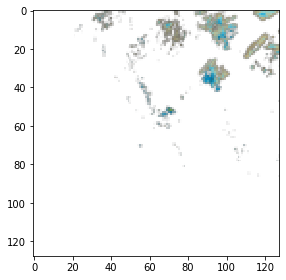

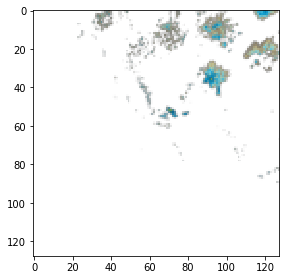

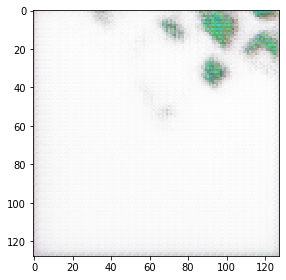

In [12]:
# Perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train))
imshow(X_train[ix]) #input image
plt.show()
imshow(np.squeeze(Y_train[ix])) #target output
plt.show()
imshow(np.squeeze(preds_train[ix])) #predicted output
plt.show()

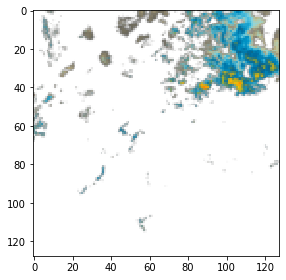

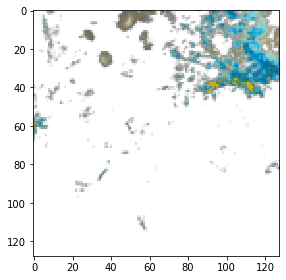

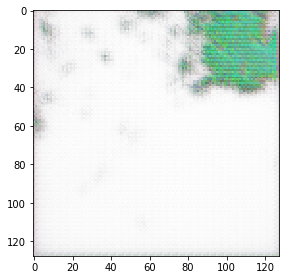

In [13]:
# Perform a sanity check on some random validation samples
ix = random.randint(0, len(preds_val))
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val[ix]))
plt.show()